In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs, SoupStrainer
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
page = 1
list_articles = []
while page != 70:
      url = f"https://www.balancetonporc.com/categorie/les-temoignages/page/{page}/"
      response = requests.get(url)
      html = response.content
      soup = bs(response.content, 'lxml')
      for article in soup.find_all("div", class_="item-inner"):
            t_article = {}
            try:
                    t_article["Titre"] = article.find("h2", class_="title").get_text(strip=True)
            except:
                    t_article["Titre"] = ''
            try:
                    t_article["Thème"] = article.a.get_text(strip=True)
            except:
                    t_article["Thème"] = ''
            try:
                    t_article["Post"] = article.find("div", class_="content-wrap").get_text(strip=True)
            except:
                    t_article["Post"] = ''
            try:
                    t_article["Date"] = article.time['datetime']
            except:
                    t_article["Date"] = ''
            list_articles.append(t_article)
      page = page + 1 

In [ ]:
for t_article in list_articles[:5]:
    print(list_articles)

In [11]:
articles_df = pd.DataFrame(list_articles)
articles_df

,Titre,Thème,Post,Date
0,"Photos à mon insu, pedopornographie",Au sein du couple,,2023-08-07T14:00:17+02:00
1,Plainte pour menace de viol,Autre,,2023-08-07T08:47:45+02:00
2,Viol entre époux,Au sein du couple,,2023-08-06T13:25:39+02:00
3,J’ai été touchée par mon frère quand j’étais p...,Cercle familial,,2023-08-06T00:27:40+02:00
4,Toxique-rappeur/manipulateur/menteur,Autre,,2023-08-04T15:39:52+02:00
...,...,...,...,...
2272,,J’ai été touchée par mon frère quand j’étais p...,,
2273,,Toxique-rappeur/manipulateur/menteur,,
2274,,,,2018-08-10T20:45:37+02:00
2275,,,,2018-08-04T21:30:39+02:00


In [12]:
articles_df = articles_df.reset_index()

In [13]:
# convert the date column into a datetime object
articles_df['Date'] = pd.to_datetime(articles_df['Date'], utc=True)

In [14]:
# extract the day, month, and year components
articles_df['month'] = articles_df['Date'].dt.month
articles_df['year'] = articles_df['Date'].dt.year

# show the modified data frame
print(articles_df)

      index                                              Titre  \
0         0                Photos à mon insu, pedopornographie   
1         1                        Plainte pour menace de viol   
2         2                                   Viol entre époux   
3         3  J’ai été touchée par mon frère quand j’étais p...   
4         4               Toxique-rappeur/manipulateur/menteur   
...     ...                                                ...   
2272   2272                                                      
2273   2273                                                      
2274   2274                                                      
2275   2275                                                      
2276   2276                                                      

                                                  Thème Post  \
0                                     Au sein du couple        
1                                                 Autre        
2              

In [20]:
articles_df['Thème'].value_counts()

Autre                                                  356
Cercle familial                                        324
                                                       207
Au sein du couple                                      197
Au travail                                             162
J’ai été touchée par mon frère quand j’étais petite    138
Photos à mon insu, pedopornographie                    138
Plainte pour menace de viol                            138
Toxique-rappeur/manipulateur/menteur                   138
Viol entre époux                                       138
Milieu médical                                          88
Lieu public                                             82
Milieu scolaire                                         77
Attitude sexiste                                        33
Harcèlement de rue                                      32
Exhibitionnisme                                         27
Milieu religieux                                        

In [ ]:
articles_df['year'].value_counts()

In [15]:
years_df = articles_df['year'].value_counts().to_frame().reset_index()
years_df

,index,year
0,2022.0,866
1,2023.0,326
2,2018.0,207
3,2021.0,188


In [16]:
years_df = articles_df['year'].value_counts().to_frame().reset_index()
years_df.rename(columns={"index":"Year", "year":"Nombre de témoignages"}, inplace=True)
print(years_df)

     Year  Nombre de témoignages
0  2022.0                    866
1  2023.0                    326
2  2018.0                    207
3  2021.0                    188


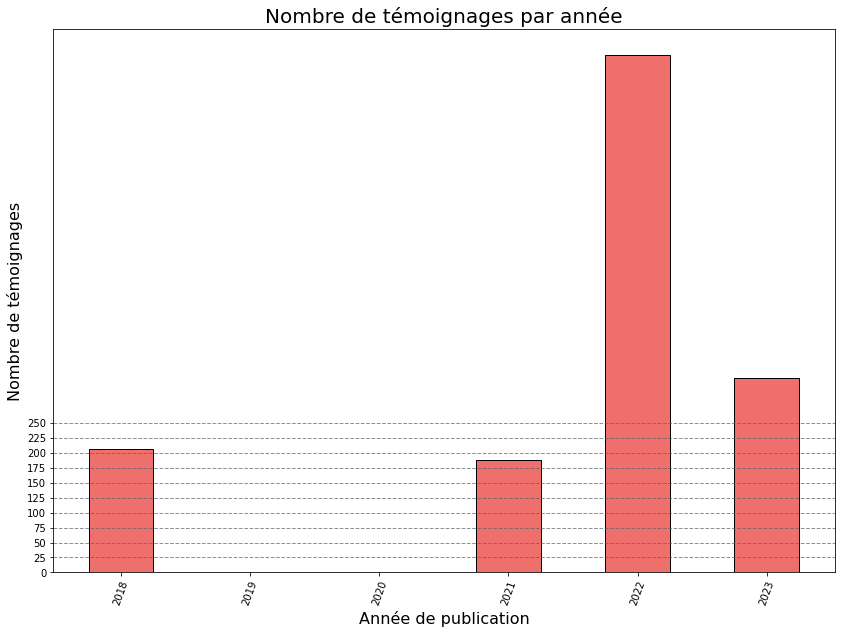

In [17]:
plt.figure(figsize=(14, 10))
plt.title("Nombre de témoignages par année", fontsize = 20)
plt.yticks(np.arange(0, 275, step=25))
plt.xticks(rotation= 70)
plt.ylabel("Nombre de témoignages", fontsize = 16)
plt.xlabel("Année de publication", fontsize = 16)
plt.bar(years_df["Year"], years_df["Nombre de témoignages"], width = 0.5, color = "#EF6F6C", edgecolor = "black")
plt.grid(color='#59656F', linestyle='--', linewidth=1, axis='y', alpha=0.7)

In [19]:
articles_df.to_csv('file_name.csv', encoding='utf-8')